<ipython-input-3-d5fe63931e03>:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = data.resample('M').sum()


<Figure size 1000x500 with 0 Axes>

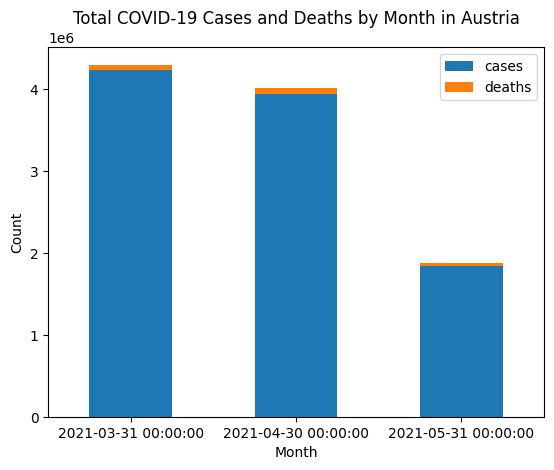

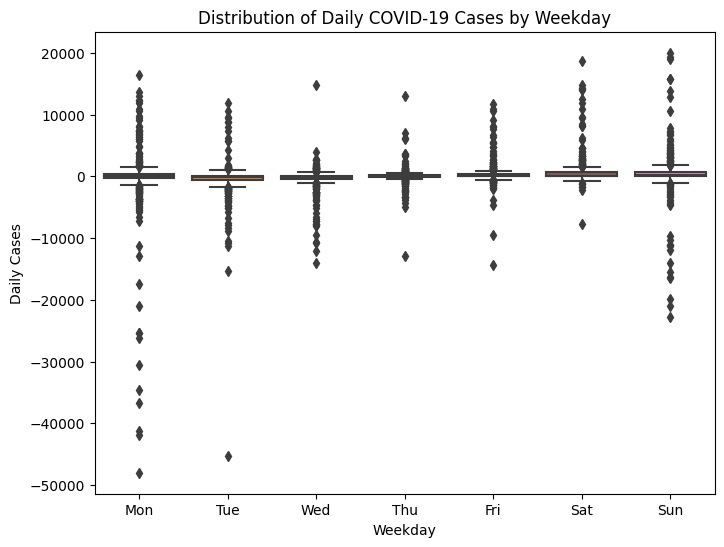

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your COVID-19 data into a pandas DataFrame
data = pd.read_csv("/content/Covid_19_cases4.csv")  # Replace with the path to your data file

# Convert the "dateRep" column to datetime
data['dateRep'] = pd.to_datetime(data['dateRep'], format='%d-%m-%Y')

# Create a new column for daily cases
data['daily_cases'] = data['cases'].diff()

# Create a new column for the 7-day rolling average of daily cases
data['rolling_avg_cases'] = data['daily_cases'].rolling(window=7).mean()

# Set the date as the index for time series plots
data.set_index('dateRep', inplace=True)



# Plot 2: Bar Plot of Total Cases and Deaths by Month
monthly_data = data.resample('M').sum()
plt.figure(figsize=(10, 5))
monthly_data[['cases', 'deaths']].plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Total COVID-19 Cases and Deaths by Month in Austria')
plt.xticks(rotation=0)
plt.show()



# Plot 4: Box Plot of Daily Cases by Weekday
data['weekday'] = data.index.weekday
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='weekday', y='daily_cases')
plt.xlabel('Weekday')
plt.ylabel('Daily Cases')
plt.title('Distribution of Daily COVID-19 Cases by Weekday')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()
